<h1>Stock Prediction</h1>
<p>Stock prediction is the prediction of stock values in future. With the help of machine learning, we can train a predictor to predict future values of stock. RNN are generally used to capture temporal patterns. LSTM is a type of recurrent network that makes use of memory blocks to capture long term dependencies.</p>

<h3>Data Exploration</h3>
<p>The dataset used for this project is the historical daily stock data of Machhapuchre Bank Limited(MBL) listed in Nepal Stock Exchange (NEPSE), obtained through NepseAlpha's data api in csv format.</p>
Source: <a href="https://nepsealpha.com/nepse-data">NepseAlpha</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("assets/mbl_data.csv",index_col=1,parse_dates=['Date'])
df.head()

,Symbol,Open,High,Low,Close,Percent Change,Volume
Date,,,,,,,
2024-08-22,MBL,280.0,289.0,277.1,286.2,2.25 %,"284,184.00"
2024-08-21,MBL,281.0,286.0,272.0,279.9,-0.39 %,"345,405.00"
2024-08-18,MBL,280.0,295.0,273.0,281.0,1.08 %,"666,974.00"
2024-08-15,MBL,262.1,282.7,258.1,278.0,8.17 %,"754,130.00"
2024-08-14,MBL,258.0,258.5,248.4,257.0,1.58 %,"167,329.00"


We can see it is a multi-dimensional time series data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1127 entries, 2024-08-22 to 2019-08-25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          1127 non-null   object 
 1   Open            1127 non-null   float64
 2   High            1127 non-null   float64
 3   Low             1127 non-null   float64
 4   Close           1127 non-null   float64
 5   Percent Change  1127 non-null   object 
 6   Volume          1127 non-null   object 
dtypes: float64(4), object(3)
memory usage: 70.4+ KB


<p>The dataset consists of 6 features with timestamp as the index of the dataframe. We can see no null values here.</p>
<p>We can see the features <i>Percent Change</i> and <i>Volume</i> are non numeric datatype here.</p> 

In [4]:
df.describe()

,Open,High,Low,Close
count,1127.000000,1127.000000,1127.000000,1127.000000
mean,256.254658,259.866016,251.690594,255.397693
std,59.543404,60.683501,57.915569,59.036109
min,158.000000,161.900000,157.800000,159.500000
25%,220.450000,224.000000,218.300000,221.000000
50%,238.000000,241.000000,233.000000,236.000000
75%,286.600000,291.000000,281.500000,286.600000
max,450.000000,455.000000,429.000000,442.900000


The above table shows the statistical data for each numeric column.

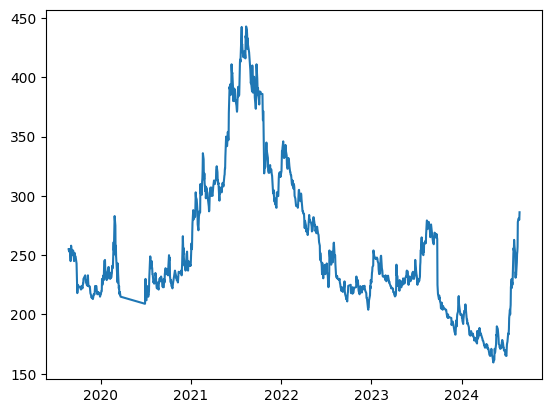

In [5]:
plt.plot(df['Close'])

The above graph shows time varying historical data of feature <i>Close</i>.

In [6]:
print("Date ranges from {start_date} to {end_date}".format(start_date=df.index[-1], end_date=df.index[0]))

Date ranges from 2019-08-25 00:00:00 to 2024-08-22 00:00:00


The dataset contains data of about 5 years.